In [7]:
import numpy as np
import pandas as pd

In [8]:
data=pd.read_csv("/content/play_tennis.csv")
data.head()

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes


In [59]:

X=data.drop('play',axis=1)
y=data.iloc[:,-1].values


In [60]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

data['temp']=le.fit_transform(data['temp'])
data['outlook']=le.fit_transform(data['outlook'])
data['wind']=le.fit_transform(data['wind'])
data['humidity']=le.fit_transform(data['humidity'])
data['play']=le.fit_transform(data['play'])






In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [63]:
from sklearn.naive_bayes import GaussianNB
gn=GaussianNB()

In [64]:
X

,outlook,temp,humidity,wind
0,2,1,0,1
1,2,1,0,0
2,0,1,0,1
3,1,2,0,1
4,1,0,1,1
5,1,0,1,0
6,0,0,1,0
7,2,2,0,1
8,2,0,1,1
9,1,2,1,1


In [66]:
gn.fit(X_train,y_train)

GaussianNB()

In [67]:
y_pred=gn.predict(X_test)

In [68]:
from sklearn import metrics as m
print(m.accuracy_score(y_test,y_pred))

0.6


In [73]:
print(m.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.67      0.67      0.67         3

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5



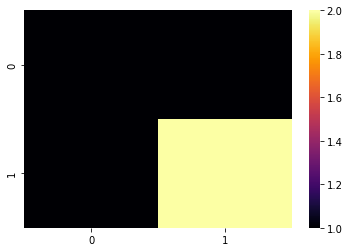

In [75]:
import seaborn as sns
sns.heatmap(m.confusion_matrix(y_test,y_pred),cmap='inferno')